In [ ]:
import shutil
import os

def delete_directory(directory_path):

    if os.path.exists(directory_path):

        shutil.rmtree(directory_path)
        print(f"Directory '{directory_path}' has been deleted successfully.")
    else:
        print(f"Directory '{directory_path}' does not exist.")


directory_path = "/content/yolo/train"
delete_directory(directory_path)
print("donw")

Directory '/content/yolo/train' has been deleted successfully.
donw


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp -r /content/custom_dataset_Dupe_RemovedClasses /content/drive/MyDrive/dataset_mcw

datasetmcw


In [ ]:
!pip install -U -q PyDrive

In [ ]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create Google Drive folder object
folder_path = '/content/drive/MyDrive/my_folder'  # Path to your folder
folder_name = folder_path.split('/')[-1]  # Folder name

# Create the folder in Google Drive
folder_metadata = {'title': folder_name, 'mimeType': 'application/vnd.google-apps.folder'}
folder = drive.CreateFile(folder_metadata)
folder.Upload()

# Set folder permission to "Anyone with the link"
folder.InsertPermission({
    'type': 'anyone',
    'value': 'anyone',
    'role': 'reader'
})

# Get shareable link
shareable_link = folder['alternateLink']
print(f"Shareable link: {shareable_link}")


Shareable link: https://drive.google.com/drive/folders/1Tx4b6qbVdfjVtezlSkbYGCCAvTcEPgHy


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="KCvncJ7BH9HYYf0i2mmN")
project = rf.workspace("odphase2-x7de2").project("custom_dataset-2-3-_dupe_removedclasses")
version = project.version(6)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to custom_dataset(2&3)_Dupe_RemovedClasses-6 in coco:: 100%|██████████| 7217/7217 [00:01<00:00, 4236.29it/s]


In [ ]:
import json
from collections import defaultdict
annotations_path = '/content/custom_dataset(2&3)_Dupe_RemovedClasses-6/train/_annotations.coco.json'
images_path = '/content/custom_dataset(2&3)_Dupe_RemovedClasses-6/train'
with open(annotations_path) as f:
    coco_data = json.load(f)


category_count = defaultdict(int)

for annotation in coco_data['annotations']:
    category_id = annotation['category_id']
    category_count[category_id] += 1

with open(annotations_path) as f:
    coco_data = json.load(f)


category_count = defaultdict(int)

for annotation in coco_data['annotations']:
    category_id = annotation['category_id']
    category_count[category_id] += 1

category_count = dict(category_count)

sorted_dict = dict(sorted(category_count.items(), reverse=False))
print("Category ID counts:", sorted_dict)

with open('category_counts_train.json', 'w') as outfile:
    json.dump(sorted_dict, outfile, indent=4)

print("Category count dictionary has been saved to 'category_counts.json'.")


Category ID counts: {1: 1080, 2: 1640, 3: 1279, 4: 898, 5: 2503, 6: 1541, 7: 3123, 8: 9347, 9: 3758, 10: 3380, 11: 1669, 12: 234, 13: 5367, 14: 839, 15: 166, 16: 277, 17: 1349, 18: 136, 19: 3220, 20: 99}
Category count dictionary has been saved to 'category_counts.json'.


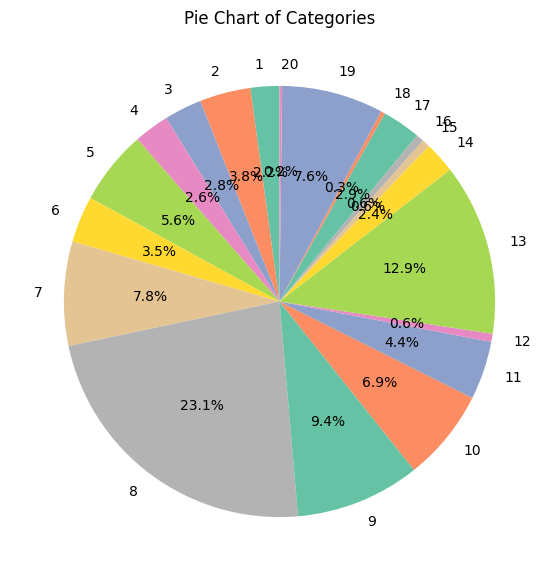



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future

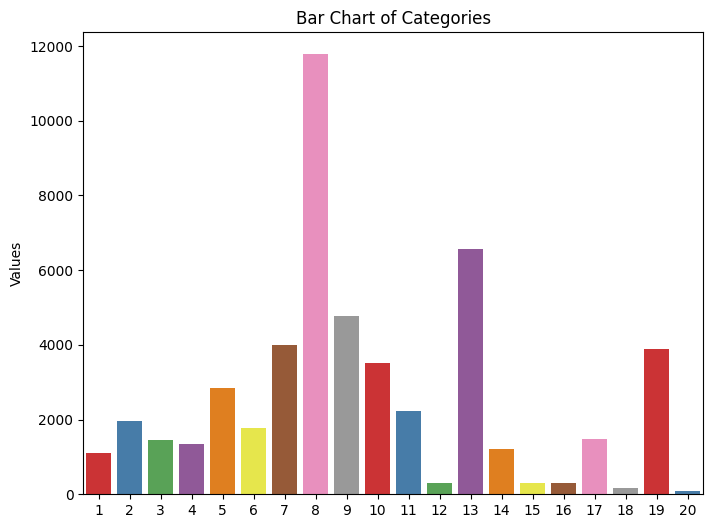

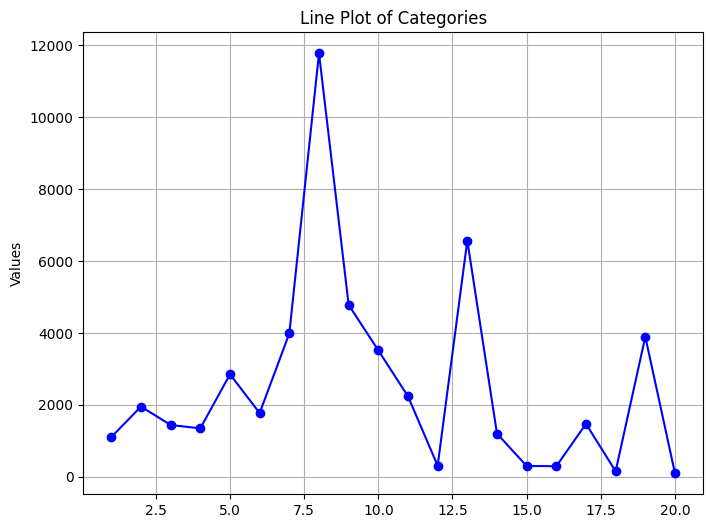

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example dictionary
data = sorted_dict

# Extract keys and values
labels = list(data.keys())
values = list(data.values())

# 1. Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Pie Chart of Categories")
plt.show()
print()
# 2. Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, palette='Set1')
plt.title("Bar Chart of Categories")
plt.ylabel('Values')
plt.show()
print()
# 3. Line Plot (Useful for trends)
plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', linestyle='-', color='b')
plt.title("Line Plot of Categories")
plt.ylabel('Values')
plt.grid(True)
plt.show()



In [ ]:
import json
from collections import defaultdict
annotations_path = '/content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/_annotations.coco.json'
images_path = '/content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train'
with open(annotations_path) as f:
    coco_data = json.load(f)


category_count = defaultdict(int)

for annotation in coco_data['annotations']:
    category_id = annotation['category_id']
    category_count[category_id] += 1

with open(annotations_path) as f:
    coco_data = json.load(f)


category_count = defaultdict(int)

for annotation in coco_data['annotations']:
    category_id = annotation['category_id']
    category_count[category_id] += 1

category_count = dict(category_count)

sorted_dict = dict(sorted(category_count.items(), reverse=False))
print("Category ID counts:", sorted_dict)

with open('category_counts_train.json', 'w') as outfile:
    json.dump(sorted_dict, outfile, indent=4)

print("Category count dictionary has been saved to 'category_counts.json'.")

Category ID counts: {1: 1106, 2: 1954, 3: 1441, 4: 1348, 5: 2851, 6: 1774, 7: 3989, 8: 11778, 9: 4781, 10: 3517, 11: 2239, 12: 310, 13: 6571, 14: 1202, 15: 302, 16: 295, 17: 1473, 18: 155, 19: 3896, 20: 99}
Category count dictionary has been saved to 'category_counts.json'.


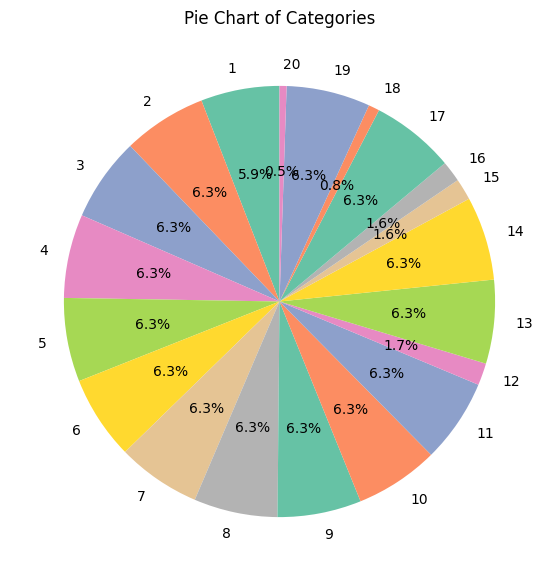



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



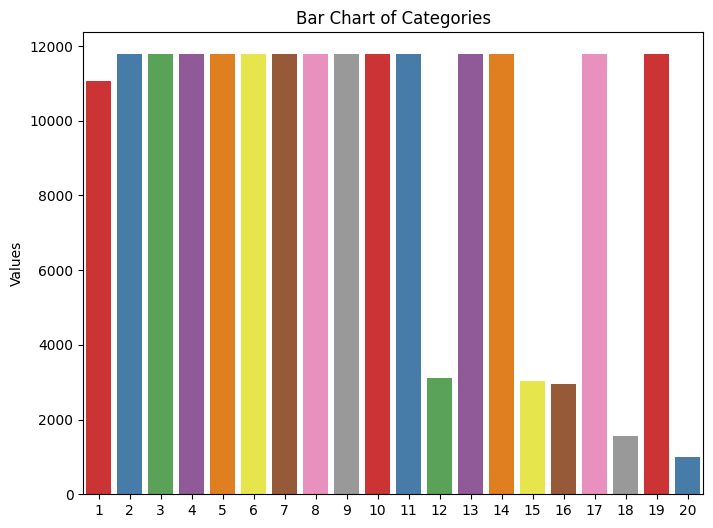

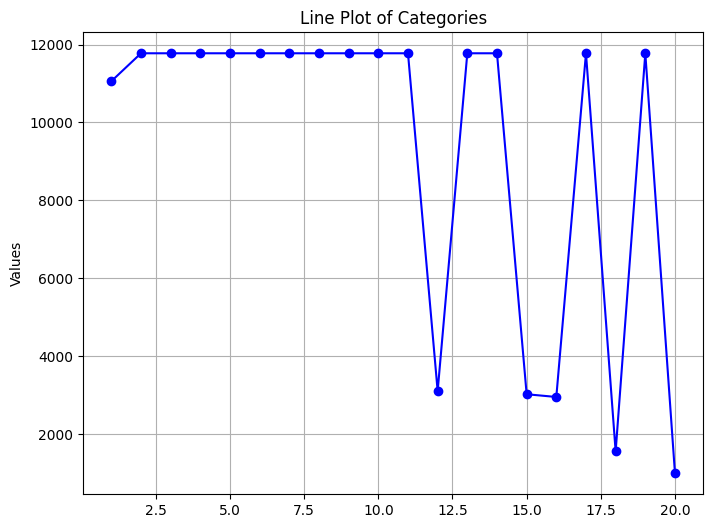

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example dictionary
data = sorted_dict

# Extract keys and values
labels = list(data.keys())
values = list(data.values())

# 1. Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Pie Chart of Categories")
plt.show()
print()
# 2. Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, palette='Set1')
plt.title("Bar Chart of Categories")
plt.ylabel('Values')
plt.show()
print()
# 3. Line Plot (Useful for trends)
plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', linestyle='-', color='b')
plt.title("Line Plot of Categories")
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [ ]:
import statistics
def stats(category_count):
  values = list(category_count.values())
  mean_value = statistics.mean(values)
  median_value = statistics.median(values)
  var =  statistics.variance(values)
  print("Mean of values:", mean_value)
  print("Median of values:", median_value)


  above_mean = 0
  below_mean = 0
  above_median = 0
  below_median = 0

  for value in values:
      if value > mean_value:
          above_mean += 1
      elif value < mean_value:
          below_mean += 1

      if value > median_value:
          above_median += 1
      elif value < median_value:
          below_median += 1
  print(f"Mean: {mean_value}")
  print(f"Categories above mean: {above_mean}")
  print(f"Categories below mean: {below_mean}\n")

  print(f"Median: {median_value}")
  print(f"Categories above median: {above_median}")
  print(f"Categories below median: {below_median}")
  print()
  print(f"max: {max(values)}")
  print(f"min: {min(values)}")
  print(f"var: {var}")


In [ ]:
stats(category_count)

Mean of values: 2554.05
Median of values: 1623.5
Mean: 2554.05
Categories above mean: 7
Categories below mean: 13

Median: 1623.5
Categories above median: 10
Categories below median: 10

max: 11778
min: 99
var: 7731584.5763157895


In [ ]:
with open(annotations_path) as f:
    data = json.load(f)


image_ids = {annotation["image_id"] for annotation in data["annotations"]}
total_images = len(image_ids)

print("Total number of images:", total_images)


Total number of images: 7105


In [ ]:

import json
from collections import defaultdict


with open(annotations_path) as f:
    data = json.load(f)


category_image_count = defaultdict(set)


for annotation in data['annotations']:
    category_id = annotation['category_id']
    image_id = annotation['image_id']
    category_image_count[category_id].add(image_id)

category_image_count = {category_id: len(image_ids) for category_id, image_ids in category_image_count.items()}
sorted_dict_count = dict(sorted(category_image_count.items(), reverse=False))

with open('category_image_count.json', 'w') as json_file:
    json.dump(sorted_dict_count, json_file, indent=4)
print(sorted_dict_count)
print("Category image count saved to 'category_image_count.json'.")


{1: 280, 2: 1422, 3: 632, 4: 963, 5: 1706, 6: 1444, 7: 2452, 8: 3514, 9: 1860, 10: 1320, 11: 906, 12: 169, 13: 2561, 14: 941, 15: 255, 16: 215, 17: 1023, 18: 73, 19: 2435, 20: 93}
Category image count saved to 'category_image_count.json'.


In [ ]:
stats(sorted_dict_count)

Mean of values: 1213.2
Median of values: 993.0
Mean: 1213.2
Categories above mean: 9
Categories below mean: 11

Median: 993.0
Categories above median: 10
Categories below median: 10

max: 3514
min: 73
var: 944360.2736842105


In [ ]:
import json
import itertools
from collections import defaultdict


with open(annotations_path) as f:
    data = json.load(f)


category_to_images = defaultdict(set)


for annotation in data['annotations']:
    category_id = annotation['category_id']
    image_id = annotation['image_id']
    category_to_images[category_id].add(image_id)


unique_category_ids = list(category_to_images.keys())


common_image_counts = {}

for r in range(2, 5):
    for subset in itertools.combinations(unique_category_ids, r):
        common_images = set.intersection(*(category_to_images[cat_id] for cat_id in subset))
        common_image_counts[str(subset)] = len(common_images)


sorted_common_image_counts = dict(sorted(common_image_counts.items(), key=lambda item: item[1], reverse=True))
top_25_images = dict(sorted(sorted_common_image_counts.items(), key=lambda item: item[1], reverse=True)[:25])

with open('common_image_counts.json', 'w') as json_file:
    json.dump(sorted_common_image_counts, json_file, indent=4)

with open('toprepeatedimagecounts.json', 'w') as json_file:
    json.dump(top_25_images, json_file, indent=4)



print("Common image counts saved to 'common_image_counts.json'.")



Common image counts saved to 'common_image_counts.json'.


In [ ]:
stats(top_25_images)

Mean of values: 1174.04
Median of values: 1035
Mean: 1174.04
Categories above mean: 10
Categories below mean: 15

Median: 1035
Categories above median: 12
Categories below median: 12

max: 2490
min: 771
var: 168875.04


{"id":0,"image_id":0,"category_id":10,"bbox":[378,18,249,247],"area":61503,"segmentation":[],"iscrowd":0}

In [ ]:
stats(category_count)

Mean of values: 2554.05
Median of values: 1623.5
Mean: 2554.05
Categories above mean: 7
Categories below mean: 13

Median: 1623.5
Categories above median: 10
Categories below median: 10

max: 11778
min: 99
var: 7731584.5763157895


In [ ]:
values = list(category_count.values())
mean_value = statistics.mean(values)
max_value = max(values)
min_value = min(values)
constant = max_value / mean_value * 100
thres = max_value - constant

above_thres = 0
below_thres = 0


above_thres_dict = {}
below_thres_dict = {}
actual_list = []
del_list = []

for category_id, value in category_count.items():
    if value > thres:
        above_thres_dict[category_id] = value
        above_thres += 1
        del_list.append(category_id)
    elif value < thres:
        below_thres_dict[category_id] = value
        below_thres += 1
        actual_list.append(category_id)
print('thres',thres)
print("above : ", above_thres)
print("below : ", below_thres)

print("Above threshold category ids:", above_thres_dict)
print("Below threshold category ids:", below_thres_dict)
print("actual list : ", actual_list)
print("del list: ",del_list)


thres 11316.850061666764
above :  1
below :  19
Above threshold category ids: {8: 11778}
Below threshold category ids: {1: 1106, 7: 3989, 13: 6571, 12: 310, 4: 1348, 17: 1473, 19: 3896, 9: 4781, 2: 1954, 11: 2239, 5: 2851, 18: 155, 10: 3517, 3: 1441, 6: 1774, 14: 1202, 15: 302, 20: 99, 16: 295}
actual list :  [1, 7, 13, 12, 4, 17, 19, 9, 2, 11, 5, 18, 10, 3, 6, 14, 15, 20, 16]
del list:  [8]


In [ ]:

import json
import shutil
import os
coco_annotation_file = annotations_path
image_folder = images_path


target_category_ids = actual_list

with open(coco_annotation_file, 'r') as f:
    coco_data = json.load(f)


filtered_images = []
filtered_annotations = []
image_ids = set()


for annotation in coco_data['annotations']:
    if annotation['category_id'] in target_category_ids:
        filtered_annotations.append(annotation)
        image_ids.add(annotation['image_id'])


for image in coco_data['images']:
    if image['id'] in image_ids:
        filtered_images.append(image)

output_dir = f"output_categories_1"
output_annotation_file = os.path.join(output_dir, f"annotations_categories_1.json")
output_image_folder = os.path.join(output_dir, "images")

filtered_coco_data = {
    "info": coco_data['info'],
    "licenses": coco_data['licenses'],
    "images": filtered_images,
    "annotations": filtered_annotations,
    "categories": coco_data['categories']
}


os.makedirs(output_image_folder, exist_ok=True)


with open(output_annotation_file, 'w') as f:
    json.dump(filtered_coco_data, f)

for image in filtered_images:
    src_image_path = os.path.join(image_folder, image['file_name'])
    print(f"Checking path: {src_image_path}")  # Debugging line
    dst_image_path = os.path.join(output_image_folder, image['file_name'])
    if not os.path.exists(src_image_path):
        print(f"File not found: {src_image_path}")
    else:
        shutil.copyfile(src_image_path, dst_image_path)


print(f"Filtered dataset for category_ids {target_category_ids} saved in {output_dir}!")


Streaming output truncated to the last 5000 lines.
Checking path: /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/frame_1080_jpg.rf.ea7d301fd04b6eabc4c18d7cb5281d6c.jpg
Checking path: /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/-trashed-1710844118-VID20240217180228_000065_jpg.rf.ea029e798baf46c5bb55c91ac91badff.jpg
Checking path: /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/VID_20240225_162546_000004_jpg.rf.ea065c70dd7ccc5a36563ad387ee8922.jpg
Checking path: /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/VID_20240225_162214_000018_jpg.rf.eaef553ce3d788276e48b988035b9ee2.jpg
Checking path: /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/_trashed-1710844522-VID20240217175450_mp4-0019_jpg.rf.ea33642333e82adac29f485531ecf095.jpg
Checking path: /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/Screenshot_2024-02-26-20-43-18-73_99c04817c0de5652397fc8b56c3b3817_jpg.rf.ea55a147dc89f6d4732c569e5e820b80.jpg
Checking path: /content/custo

In [ ]:
'''import json


annotation_file = annotations_path

del_files = del_list


with open(annotation_file, 'r') as f:
    coco_data = json.load(f)


filtered_annotations = [ann for ann in coco_data['annotations'] if ann['category_id'] not in del_files]


coco_data['annotations'] = filtered_annotations


with open(annotation_file, 'w') as f:
    json.dump(coco_data, f)

print(f"Annotations with category_ids {del_files} removed and saved back to {annotation_file}.")'''


'import json\n\n\nannotation_file = annotations_path\n\ndel_files = del_list\n\n\nwith open(annotation_file, \'r\') as f:\n    coco_data = json.load(f)\n\n\nfiltered_annotations = [ann for ann in coco_data[\'annotations\'] if ann[\'category_id\'] not in del_files]\n\n\ncoco_data[\'annotations\'] = filtered_annotations\n\n\nwith open(annotation_file, \'w\') as f:\n    json.dump(coco_data, f)\n\nprint(f"Annotations with category_ids {del_files} removed and saved back to {annotation_file}.")'

In [ ]:
import os
import json
import shutil
from collections import defaultdict
main_annotation_file = annotations_path
main_image_folder = images_path
additional_annotation_file = "/content/output_categories_1/annotations_categories_1.json"
additional_image_folder = "/content/output_categories_1/images"
def addImages(main_annotation_file, main_image_folder, additional_annotation_file, additional_image_folder):
    list_completed = []
    with open(main_annotation_file, 'r') as f:
        main_coco_data = json.load(f)

    with open(additional_annotation_file, 'r') as f:
        additional_coco_data = json.load(f)


    max_image_id = max(image['id'] for image in main_coco_data['images'])
    max_annotation_id = max(annotation['id'] for annotation in main_coco_data['annotations'])


    adjusted_images = []
    adjusted_annotations = []
    copied_images_count = 0
    renamed_images_count = 0


    category_counts = defaultdict(int)


    for annotation in main_coco_data['annotations']:
        category_counts[annotation['category_id']] += 1

    existing_files = set(os.listdir(main_image_folder))

    # Iterate through additional images
    for image in additional_coco_data['images']:

        # Increment and assign new image ID
        new_image_id = max_image_id + 1
        max_image_id += 1

        # Copy the image info and assign a new ID
        new_image = image.copy()
        new_image['id'] = new_image_id

        # Paths for source and destination images
        src_image_path = os.path.join(additional_image_folder, image['file_name'])
        dst_image_path = os.path.join(main_image_folder, image['file_name'])

        # Check if the image already exists in the main folder
        if os.path.exists(dst_image_path):
            # Generate a unique filename if it already exists
            dst_image_path = generate_unique_filename(dst_image_path)
            new_image['file_name'] = os.path.basename(dst_image_path)
            renamed_images_count += 1
            print(f"Image {src_image_path} exists, renamed to {dst_image_path}")
        else:
            print(f"Copied {src_image_path} to {dst_image_path}")


        shutil.copyfile(src_image_path, dst_image_path)
        adjusted_images.append(new_image)
        copied_images_count += 1

        for annotation in additional_coco_data['annotations']:
            if annotation['image_id'] == image['id']:
                category_id = annotation['category_id']


                if category_counts[category_id] >= max_value:
                    list_completed.append(category_id)

                    print(f"Category {category_id} has reached max_values. Skipping further annotations for this category.")
                    continue

                new_annotation_id = max_annotation_id + 1
                max_annotation_id += 1


                new_annotation = annotation.copy()
                new_annotation['id'] = new_annotation_id
                new_annotation['image_id'] = new_image_id
                adjusted_annotations.append(new_annotation)


                category_counts[category_id] += 1


    main_coco_data['images'].extend(adjusted_images)
    main_coco_data['annotations'].extend(adjusted_annotations)

    with open(main_annotation_file, 'w') as f:
        json.dump(main_coco_data, f)


    print(f"Successfully merged datasets and saved to {main_annotation_file}.")
    print(f"Total images copied: {copied_images_count}")
    print(f"Total images renamed (due to conflict): {renamed_images_count}")
    com = set(list_completed)
    com1 = list(com)
    return com1


def generate_unique_filename(file_path):
    base, ext = os.path.splitext(file_path)
    counter = 1
    new_file_path = f"{base}_{counter}{ext}"
    while os.path.exists(new_file_path):
        counter += 1
        new_file_path = f"{base}_{counter}{ext}"
    return new_file_path


addImages(main_annotation_file, main_image_folder, additional_annotation_file, additional_image_folder)





Streaming output truncated to the last 5000 lines.
Image /content/output_categories_1/images/VID20240218121906_TVMkSL_000092_jpg.rf.5c414f722bd554f35a051101a63953db.jpg exists, renamed to /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/VID20240218121906_TVMkSL_000092_jpg.rf.5c414f722bd554f35a051101a63953db_1.jpg
Image /content/output_categories_1/images/VID20240218122339_xwSLhd_000013_jpg.rf.5c7eda8d7a9016cf695fd407cbfd55d2.jpg exists, renamed to /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/VID20240218122339_xwSLhd_000013_jpg.rf.5c7eda8d7a9016cf695fd407cbfd55d2_1.jpg
Image /content/output_categories_1/images/VID-20240225-WA0034_000011_jpg.rf.5bf898bd82b2b9c873fc0e46cc04a64f.jpg exists, renamed to /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/VID-20240225-WA0034_000011_jpg.rf.5bf898bd82b2b9c873fc0e46cc04a64f_1.jpg
Image /content/output_categories_1/images/VID_20240225_120449_000023_jpg.rf.5ca023d16457e75a481f0669f9915732.jpg exists, renamed to /content/cu

[13]

In [ ]:

import os
import json
from PIL import Image, ImageEnhance
import numpy as np
def augment_image(image):
    augmentations = []
    types = []

    # Flip image horizontally
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    augmentations.append(flipped_image)
    types.append("flipped")

    # Change brightness
    enhancer = ImageEnhance.Brightness(image)
    bright_image = enhancer.enhance(1.5)
    augmentations.append(bright_image)
    types.append("bright")

    # Change contrast
    enhancer = ImageEnhance.Contrast(image)
    contrast_image = enhancer.enhance(1.5)
    augmentations.append(contrast_image)
    types.append("contrast")

    # Change color balance
    enhancer = ImageEnhance.Color(image)
    color_image = enhancer.enhance(2.0)
    augmentations.append(color_image)
    types.append("color")

    return augmentations, types


def flip_bbox_horizontally(bbox, image_width):
    """
    Adjust bounding box after horizontal flip.
    bbox: [x_min, y_min, width, height]
    """
    x_min, y_min, width, height = bbox
    x_new = image_width - (x_min + width)
    return [x_new, y_min, width, height]


def process_images_and_annotations(image_dir, annotation_file, output_dir):
    # Load the original COCO annotations
    with open(annotation_file, 'r') as f:
        coco_data = json.load(f)

    # Create output directories for augmented images and updated annotations
    augmented_image_dir = os.path.join(output_dir, "images")
    os.makedirs(augmented_image_dir, exist_ok=True)  # Ensure the directory exists

    updated_annotations = {
        "info": coco_data.get("info", {}),
        "licenses": coco_data.get("licenses", []),
        "images": [],
        "annotations": [],
        "categories": coco_data["categories"]  # Keep the categories as they are
    }

    # Keep track of the new images and annotations
    max_image_id = max(image['id'] for image in coco_data['images'])
    max_annotation_id = max(annotation['id'] for annotation in coco_data['annotations'])

    # Loop over each image in the annotations file
    for image_info in coco_data['images']:
        image_id = image_info['id']
        image_filename = image_info['file_name']
        image_path = os.path.join(image_dir, image_filename)

        # Check if image file exists
        if not os.path.exists(image_path):
            print(f"Image {image_filename} not found, skipping.")
            continue

        original_image = Image.open(image_path)
        image_width, image_height = original_image.size

        # Get corresponding annotations for this image
        image_annotations = [anno for anno in coco_data['annotations'] if anno['image_id'] == image_id]

        # Apply augmentations to the image
        augmented_images, augmentation_types = augment_image(original_image)

        for aug_image, aug_type in zip(augmented_images, augmentation_types):
            # Save the augmented image with a new name
            aug_image_filename = f"{os.path.splitext(image_filename)[0]}_{aug_type}.jpg"
            aug_image_path = os.path.join(augmented_image_dir, aug_image_filename)

            # Save the augmented image to the output directory
            aug_image.save(aug_image_path)

            # Add the augmented image to the annotations
            max_image_id += 1
            new_image_info = {
                "id": max_image_id,
                "file_name": aug_image_filename,
                "width": image_width,
                "height": image_height
            }
            updated_annotations['images'].append(new_image_info)

            # Update the annotations for this augmented image
            for annotation in image_annotations:
                new_annotation = annotation.copy()
                new_annotation['image_id'] = max_image_id
                max_annotation_id += 1
                new_annotation['id'] = max_annotation_id

                # Update bounding box based on augmentation type
                if aug_type == "flipped":
                    new_annotation['bbox'] = flip_bbox_horizontally(annotation['bbox'], image_width)
                elif aug_type in ["bright", "contrast", "color"]:
                    # No change to bbox for brightness, contrast, or color augmentation
                    new_annotation['bbox'] = annotation['bbox']

                # Add the new annotation
                updated_annotations['annotations'].append(new_annotation)

    # Save the updated annotations in COCO format
    output_annotation_file = os.path.join(output_dir, 'augmented_annotations.json')
    with open(output_annotation_file, 'w') as f:
        json.dump(updated_annotations, f)

    print(f"Augmented images and annotations saved to {output_dir}")


# Example usage
image_dir = '/content/output_categories_1/images'
annotation_file = '/content/output_categories_1/annotations_categories_1.json'
output_dir = '/content/augmented_images'

process_images_and_annotations(image_dir, annotation_file, output_dir)


Augmented images and annotations saved to /content/augmented_images


In [ ]:
main_annotation_file = annotations_path
main_image_folder = images_path
additional_annotation_file = "/content/augmented_images/augmented_annotations.json"
additional_image_folder = "/content/augmented_images/images"
completed_val = []


completed_val1 = addImages(main_annotation_file, main_image_folder, additional_annotation_file, additional_image_folder)
completed_val.append(completed_val1)



Streaming output truncated to the last 5000 lines.
Category 13 has reached max_values. Skipping further annotations for this category.
Image /content/augmented_images/images/WhatsApp-Video-2024-02-18-at-17-58-07_f7049479_000051_jpg.rf.76c754f67d13d314bdbf5b956165b704_flipped.jpg exists, renamed to /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/WhatsApp-Video-2024-02-18-at-17-58-07_f7049479_000051_jpg.rf.76c754f67d13d314bdbf5b956165b704_flipped_1.jpg
Category 7 has reached max_values. Skipping further annotations for this category.
Image /content/augmented_images/images/WhatsApp-Video-2024-02-18-at-17-58-07_f7049479_000051_jpg.rf.76c754f67d13d314bdbf5b956165b704_bright.jpg exists, renamed to /content/custom_dataset(2&3)_Dupe_RemovedClasses-5/train/WhatsApp-Video-2024-02-18-at-17-58-07_f7049479_000051_jpg.rf.76c754f67d13d314bdbf5b956165b704_bright_1.jpg
Category 7 has reached max_values. Skipping further annotations for this category.
Image /content/augmented_images/images/What

In [ ]:
#end

In [ ]:
import shutil
import os

def delete_directory(directory_path):

    if os.path.exists(directory_path):

        shutil.rmtree(directory_path)
        print(f"Directory '{directory_path}' has been deleted successfully.")
    else:
        print(f"Directory '{directory_path}' does not exist.")


directory_path = "/content/Exp1_for-dataset-balancing-2"
#delete_directory(directory_path)
print("donw")

Directory '/content/Exp1_for-dataset-balancing-2' does not exist.
donw


In [ ]:
import json

def get_total_images_from_coco(coco_json_path):

    with open(coco_json_path, 'r') as f:
        coco_data = json.load(f)


    images = coco_data.get('images', [])


    total_images = len(images)

    print(f"Total number of images: {total_images}")
    return total_images

# Example usage
coco_json_path = annotations_path
total_images = get_total_images_from_coco(coco_json_path)


Total number of images: 42486


In [ ]:
import os

# Set the path to the folder
folder_path = images_path

# Count the number of files in the folder
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f'Total number of files: {file_count-1}')


Total number of files: 42486


In [ ]:

'''
import json
import itertools
from collections import defaultdict

# Load your COCO annotations JSON file
with open(annotations_path) as f:
    data = json.load(f)

# Create a dictionary to map category_id to image_id
category_to_images = defaultdict(set)

# Populate the dictionary with image_ids for each category_id
for annotation in data['annotations']:
    category_id = annotation['category_id']
    image_id = annotation['image_id']
    category_to_images[category_id].add(image_id)

# Get all unique category_ids
unique_category_ids = list(category_to_images.keys())

# Create a dictionary to store the counts of common images for all subsets
common_image_counts = {}

# Iterate through all possible non-empty subsets of category_ids
for r in range(1, len(unique_category_ids) + 1):
    for subset in itertools.combinations(unique_category_ids, r):
        # Find the intersection of image_ids for the given subset of category_ids
        common_images = set.intersection(*(category_to_images[cat_id] for cat_id in subset))
        # Use a tuple of the subset as the key and count the number of common images
        common_image_counts[tuple(subset)] = len(common_images)

# Output the result to a JSON file
with open('common_image_counts.json', 'w') as json_file:
    json.dump(common_image_counts, json_file, indent=4)

print("Common image counts saved to 'common_image_counts.json'.") '''



'\nimport json\nimport itertools\nfrom collections import defaultdict\n\n# Load your COCO annotations JSON file\nwith open(annotations_path) as f:\n    data = json.load(f)\n\n# Create a dictionary to map category_id to image_id\ncategory_to_images = defaultdict(set)\n\n# Populate the dictionary with image_ids for each category_id\nfor annotation in data[\'annotations\']:\n    category_id = annotation[\'category_id\']\n    image_id = annotation[\'image_id\']\n    category_to_images[category_id].add(image_id)\n\n# Get all unique category_ids\nunique_category_ids = list(category_to_images.keys())\n\n# Create a dictionary to store the counts of common images for all subsets\ncommon_image_counts = {}\n\n# Iterate through all possible non-empty subsets of category_ids\nfor r in range(1, len(unique_category_ids) + 1):\n    for subset in itertools.combinations(unique_category_ids, r):\n        # Find the intersection of image_ids for the given subset of category_ids\n        common_images = se

In [ ]:
'''
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np


image_path = '/content/_trashed-1710844522-VID20240217175247_mp4-0034_jpg.rf.072413f5f94a12a2fcadd658c03b75f7.jpg'  # Replace with your image path
original_image = Image.open(image_path)


def augment_image(image):
    augmentations = []

    rotated_image = image.rotate(45)
    augmentations.append(rotated_image)

    # Flip image horizontally
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    augmentations.append(flipped_image)

    # Change brightness
    enhancer = ImageEnhance.Brightness(image)
    bright_image = enhancer.enhance(1.5)
    augmentations.append(bright_image)

    # Change contrast
    enhancer = ImageEnhance.Contrast(image)
    contrast_image = enhancer.enhance(1.5)
    augmentations.append(contrast_image)

    # Change color balance
    enhancer = ImageEnhance.Color(image)
    color_image = enhancer.enhance(2.0)
    augmentations.append(color_image)

    return augmentations

augmented_images = augment_image(original_image)

def display_images(original, augmented):
    images = [original] + augmented
    titles = ['Original', 'Rotated', 'Flipped', 'Brightened', 'High Contrast', 'Enhanced Colors']

    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(np.asarray(img))
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


display_images(original_image, augmented_images)
'''

"\nfrom PIL import Image, ImageEnhance\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n\nimage_path = '/content/_trashed-1710844522-VID20240217175247_mp4-0034_jpg.rf.072413f5f94a12a2fcadd658c03b75f7.jpg'  # Replace with your image path\noriginal_image = Image.open(image_path)\n\n\ndef augment_image(image):\n    augmentations = []\n\n    rotated_image = image.rotate(45)\n    augmentations.append(rotated_image)\n\n    # Flip image horizontally\n    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)\n    augmentations.append(flipped_image)\n\n    # Change brightness\n    enhancer = ImageEnhance.Brightness(image)\n    bright_image = enhancer.enhance(1.5)\n    augmentations.append(bright_image)\n\n    # Change contrast\n    enhancer = ImageEnhance.Contrast(image)\n    contrast_image = enhancer.enhance(1.5)\n    augmentations.append(contrast_image)\n\n    # Change color balance\n    enhancer = ImageEnhance.Color(image)\n    color_image = enhancer.enhance(2.0)\n    augmentations.a

In [ ]:
'''import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
from PIL import Image

image_path = '/content/_trashed-1710844522-VID20240217175247_mp4-0034_jpg.rf.072413f5f94a12a2fcadd658c03b75f7.jpg'  # Replace with your image path
original_image = Image.open(image_path)
image_np = np.array(original_image)


augmentation_pipeline = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),            # Crop 0-20% of the image
    iaa.Affine(scale=(0.8, 1.2)),          # Zoom in/out by 80-120%
    iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),  # Translate by -20% to +20%
    iaa.Affine(shear=(-16, 16)),           # Shear by -16 to +16 degrees
    iaa.AdditiveGaussianNoise(scale=(10, 60)),  # Add Gaussian noise
    iaa.GaussianBlur(sigma=(0, 3.0)),      # Blur the image with a sigma of 0 to 3
    iaa.Affine(rotate=(-45, 45)),          # Rotate image by -45 to 45 degrees
    iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0))  # Sharpen image
])

# Apply augmentations
augmented_images = augmentation_pipeline(images=[image_np for _ in range(5)])

# Display original and augmented images
def display_augmented_images(original, augmented):
    images = [original] + augmented
    titles = ['Original', 'Crop', 'Zoom', 'Translate', 'Shear', 'Noise', 'Blur', 'Rotate', 'Sharpen']

    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    for ax, img, title in zip(axes, images, titles[:len(images)]):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display images
display_augmented_images(np.array(original_image), augmented_images)'''


'import numpy as np\nimport imgaug.augmenters as iaa\nimport matplotlib.pyplot as plt\nfrom PIL import Image\n\nimage_path = \'/content/_trashed-1710844522-VID20240217175247_mp4-0034_jpg.rf.072413f5f94a12a2fcadd658c03b75f7.jpg\'  # Replace with your image path\noriginal_image = Image.open(image_path)\nimage_np = np.array(original_image)\n\n\naugmentation_pipeline = iaa.Sequential([\n    iaa.Crop(percent=(0, 0.2)),            # Crop 0-20% of the image\n    iaa.Affine(scale=(0.8, 1.2)),          # Zoom in/out by 80-120%\n    iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),  # Translate by -20% to +20%\n    iaa.Affine(shear=(-16, 16)),           # Shear by -16 to +16 degrees\n    iaa.AdditiveGaussianNoise(scale=(10, 60)),  # Add Gaussian noise\n    iaa.GaussianBlur(sigma=(0, 3.0)),      # Blur the image with a sigma of 0 to 3\n    iaa.Affine(rotate=(-45, 45)),          # Rotate image by -45 to 45 degrees\n    iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0))  # Sharp

In [ ]:
import json
import os

# Define paths
coco_json_path = '/content/custom_dataset(2&3)_Dupe_RemovedClasses-6/train/_annotations.coco.json'
images_dir = '/content/custom_dataset(2&3)_Dupe_RemovedClasses-6/train/'
yolo_labels_dir = '/content/yolo/train/labels'

# Create the YOLO labels directory if it doesn't exist
os.makedirs(yolo_labels_dir, exist_ok=True)

# Load COCO annotations
with open(coco_json_path, 'r') as f:
    coco_data = json.load(f)

# Extract images and annotations
images = coco_data['images']
annotations = coco_data['annotations']
categories = coco_data['categories']

# Create a map for category_id to label index
category_mapping = {cat['id']: i for i, cat in enumerate(categories)}

# Group annotations by image_id
image_annotations = {}
for ann in annotations:
    image_id = ann['image_id']
    if image_id not in image_annotations:
        image_annotations[image_id] = []
    image_annotations[image_id].append(ann)

# Conversion function from COCO bbox format to YOLO format
def coco_to_yolo_bbox(bbox, img_width, img_height):
    x, y, width, height = bbox
    # Normalize values
    x_center = (x + width / 2) / img_width
    y_center = (y + height / 2) / img_height
    width /= img_width
    height /= img_height
    return x_center, y_center, width, height

# Iterate over each image and create corresponding YOLO label files
for img in images:
    img_id = img['id']
    img_filename = img['file_name']
    img_width = img['width']
    img_height = img['height']

    # Check if image has annotations
    if img_id not in image_annotations:
        continue

    # Open the corresponding YOLO label file
    yolo_label_path = os.path.join(yolo_labels_dir, f"{os.path.splitext(img_filename)[0]}.txt")

    with open(yolo_label_path, 'w') as label_file:
        for ann in image_annotations[img_id]:
            category_id = ann['category_id']
            bbox = ann['bbox']
            class_id = category_mapping[category_id]

            # Convert COCO bbox to YOLO bbox
            x_center, y_center, width, height = coco_to_yolo_bbox(bbox, img_width, img_height)

            # Write the label in YOLO format
            label_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print(f"YOLO format labels saved to {yolo_labels_dir}")


YOLO format labels saved to /content/yolo/train/labels


In [ ]:
import os
import shutil


source_folder = '/content/custom_dataset(2&3)_Dupe_RemovedClasses-6/train'


destination_folder = '/content/yolo/train/images'

os.makedirs(destination_folder, exist_ok=True)

image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']

for file_name in os.listdir(source_folder):

    if any(file_name.lower().endswith(ext) for ext in image_extensions):
        # Build full file paths
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)

        # Copy the image file to the destination folder
        shutil.copy2(source_path, destination_path)

print(f"Images have been successfully copied to {destination_folder}")


Images have been successfully copied to /content/yolo/train/images


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 16.8 MB/s eta 0:00:00


In [ ]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO

# Define paths
images_folder = '/content/yolo/train/images'
labels_folder = '/content/yolo/train/labels'
train_folder = '/content/dataset/train'
val_folder = '/content/dataset/val'
dataset_yaml = '/content/dataset/data.yaml'

# Create directories for train and val datasets
os.makedirs(f'{train_folder}/images', exist_ok=True)
os.makedirs(f'{train_folder}/labels', exist_ok=True)
os.makedirs(f'{val_folder}/images', exist_ok=True)
os.makedirs(f'{val_folder}/labels', exist_ok=True)

# Step 1: Split Data into Train and Test Sets

# Get a list of all images (we assume .jpg or .png) and corresponding labels
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.png'))]
label_files = [f.replace('.jpg', '.txt').replace('.png', '.txt') for f in image_files]

# Split into train and test sets
train_images, val_images = train_test_split(image_files, test_size=0.000000000001, random_state=42)

# Function to move files to respective directories
def move_files(image_list, src_images_folder, src_labels_folder, dest_folder):
    for image in image_list:
        image_path = os.path.join(src_images_folder, image)
        label_path = os.path.join(src_labels_folder, image.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Move image and corresponding label
        if os.path.exists(image_path) and os.path.exists(label_path):
            shutil.copy(image_path, os.path.join(dest_folder, 'images', image))
            shutil.copy(label_path, os.path.join(dest_folder, 'labels', image.replace('.jpg', '.txt').replace('.png', '.txt')))

# Move train and val files
move_files(train_images, images_folder, labels_folder, train_folder)
move_files(val_images, images_folder, labels_folder, val_folder)

# Step 2: Create YOLOv8 Data YAML File
yaml_content = f"""
train: {train_folder}/images
val: {val_folder}/images

nc: 21  # number of classes (change if needed)
names: [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]  # add your actual class names here
"""

# Save YAML file
with open(dataset_yaml, 'w') as f:
    f.write(yaml_content)

# Step 3: Train YOLOv8

# Load the YOLOv8 model (e.g., yolov8n.yaml for nano model)
model = YOLO('yolov8n.yaml')

# Train the model on the dataset



In [ ]:
import shutil

# Specify the source file path and the destination file path
source_path = '/content/yolo/valid/image'
destination_path = '/content/dataset/val/images'

# To move a file or directory
shutil.move(source_path, destination_path)

'/content/dataset/val/images'

In [ ]:
results = model.train(data=dataset_yaml, epochs=10, imgsz=640)

# Step 4: Evaluate YOLOv8 Model (Accuracy Metrics)

# Test the model on validation set and get metrics
val_results = model.val()

# Display results (including accuracy metrics like precision, recall, mAP, etc.)
metrics = val_results.results_dict

print(metrics)


Ultralytics 8.3.7 🚀 Python-3.10.12 torch-2.4.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/dataset/train/labels... 5700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5700/5700 [00:04<00:00, 1266.08it/s]


train: New cache created: /content/dataset/train/labels.cache


val: Scanning /content/dataset/val/labels... 1404 images, 19 backgrounds, 0 corrupt: 100%|██████████| 1423/1423 [00:01<00:00, 1342.32it/s]

val: New cache created: /content/dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      3.901      5.541      4.007         37        640: 100%|██████████| 357/357 [09:51<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [01:04<00:00,  1.44s/it]


                   all       1423       9176    0.00202     0.0532     0.0012   0.000333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.333      4.613      3.176         36        640: 100%|██████████| 357/357 [10:29<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [01:18<00:00,  1.75s/it]


                   all       1423       9176      0.335     0.0146    0.00536    0.00156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      3.004      3.807       2.73         17        640: 100%|██████████| 357/357 [11:11<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [01:02<00:00,  1.39s/it]


                   all       1423       9176      0.316      0.021     0.0136    0.00438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.809      3.406      2.502         32        640: 100%|██████████| 357/357 [11:12<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [01:09<00:00,  1.54s/it]


                   all       1423       9176      0.375     0.0531     0.0296    0.00972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.678      3.165      2.383         30        640: 100%|██████████| 357/357 [11:05<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [01:05<00:00,  1.45s/it]


                   all       1423       9176      0.467     0.0547     0.0356      0.012

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.602      3.022      2.309        121        640:  89%|████████▉ | 319/357 [10:02<01:11,  1.89s/it]